# Case iFood


[Repositório com dados](https://github.com/Victor-cb/case_ifood_aulas.git)

## Objetivos


* Colocar em prática os conhecimentos adquiridos até aqui

* Permitir que cada um avalie sua própria performance detalhadamente

* Introduzir a experiência de case interview em Data Science, método comum em processos seletivos (material baseado em um processo seletivo real)


## Dinâmica

* O case será realizado em duas fases:
  * (I) entendimento do problema e planejamento;
* (II) Execução
  * Fase I - Entendimento do Problema e Planejamento (Máximo de 25 min)
  *  Baixar os arquivos na pasta da aula ou repositório
     *  pdf: contém a descrição (em inglês) do case, seus objetivos e informações sobre os dados
     *  csv: base de dados de referência para a realização do case

* Construir um roteiro de análise (planejamento) para solução do problema, individualmente. O roteiro deve ser no formato de
* Tarefa: Descrição da tarefa
* Sub-tarefa1: Descrição/Justificativa
* Sub-tarefa2: Descrição/Justificativa
* Fase II - Execução (1h:40min)
* Cada aluno terá até 1h:40min para desenvolver a solução do case individualmente
* Ao final do tempo (aprox. às 21h:15min), deverá  anexar sua solução no drive




### Dicas

- Fase I
- Garanta que entendeu o problema, faça uma definição simples e objetiva
- Procure organizar as atividades que irá realizar.

- Fase II
- Comece entendendo o dataset: do que se tratam os dados? Qual a unidade de análise?
- Entenda melhor as features disponíveis
- Verifique se as informações são consistentes
- Que tipo de informação podemos derivar dos dados disponíveis?
- Quais tratamentos podemos realizar?
- Como comunicar nossos achados (storytelling)?


In [ ]:
# importando as bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# lendo as bases

people = pd.read_csv('/home/gleidson/Área de Trabalho/ADA-SantanderCode/Tecnicas de Programação I/conteudo aula 8/ifood_people.csv')
previ = pd.read_csv('/home/gleidson/Área de Trabalho/ADA-SantanderCode/Tecnicas de Programação I/conteudo aula 8/ifood_previous_campaing.csv')
purch = pd.read_csv('/home/gleidson/Área de Trabalho/ADA-SantanderCode/Tecnicas de Programação I/conteudo aula 8/ifood_purchase_profile.csv')



In [ ]:
df1 = pd.merge(people, previ, on='ID')
df = pd.merge(df1, purch, on='ID')

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Graduation,Single,58138.0,0,0,0,0,0,...,88,546,172,88,88,3,8,10,4,7
1,2174,1954,Graduation,Single,46344.0,1,1,0,0,0,...,1,6,2,1,6,2,1,1,2,5
2,4141,1965,Graduation,Together,71613.0,0,0,0,0,0,...,49,127,111,21,42,1,8,2,10,4
3,6182,1984,Graduation,Together,26646.0,1,0,0,0,0,...,4,20,10,3,5,2,2,0,4,6
4,5324,1981,PhD,Married,58293.0,1,0,0,0,0,...,43,118,46,27,15,5,5,3,6,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   AcceptedCmp3         2240 non-null   int64  
 8   AcceptedCmp4         2240 non-null   int64  
 9   AcceptedCmp5         2240 non-null   int64  
 10  AcceptedCmp1         2240 non-null   int64  
 11  AcceptedCmp2         2240 non-null   int64  
 12  Complain             2240 non-null   int64  
 13  Z_CostContact        2240 non-null   int64  
 14  Z_Revenue            2240 non-null   int64  
 15  Response             2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,...,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,0.072768,0.074554,0.072768,0.064286,0.013393,...,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,0.259813,0.262728,0.259813,0.245316,0.114976,...,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth'],
      dtype='object')

In [ ]:
# 1. Análise das Campanhas Anteriores

# Verificar taxa de aceitação em cada campanha anterior
aceitacao_cmp = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()
print(aceitacao_cmp)

# Verificar perfis de clientes que aceitaram as campanhas anteriores
clientes_aceitaram = df[df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) > 0]
print(clientes_aceitaram[['Income', 'Recency', 'MntWines', 'MntMeatProducts']].describe())


AcceptedCmp1    144
AcceptedCmp2     30
AcceptedCmp3    163
AcceptedCmp4    167
AcceptedCmp5    163
dtype: int64
              Income     Recency     MntWines  MntMeatProducts
count     459.000000  463.000000   463.000000       463.000000
mean    65255.583878   48.222462   611.282937       290.574514
std     20294.073554   28.882584   400.254513       278.227426
min      5648.000000    0.000000     0.000000         1.000000
25%     51406.500000   24.000000   292.000000        53.000000
50%     69969.000000   48.000000   600.000000       194.000000
75%     81001.500000   72.000000   942.000000       462.500000
max    105471.000000   99.000000  1493.000000      1607.000000


In [ ]:
# 2. Segmentação de Clientes

# verificando a correlecao entre taxa de aceitacao e clientes que aceitaram
# It looks like the column name is not "Accepted" but "Response"
correlacao = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].corrwith(df['Response'])
print(correlacao)

AcceptedCmp1    0.293982
AcceptedCmp2    0.169293
AcceptedCmp3    0.254258
AcceptedCmp4    0.177019
AcceptedCmp5    0.326634
dtype: float64


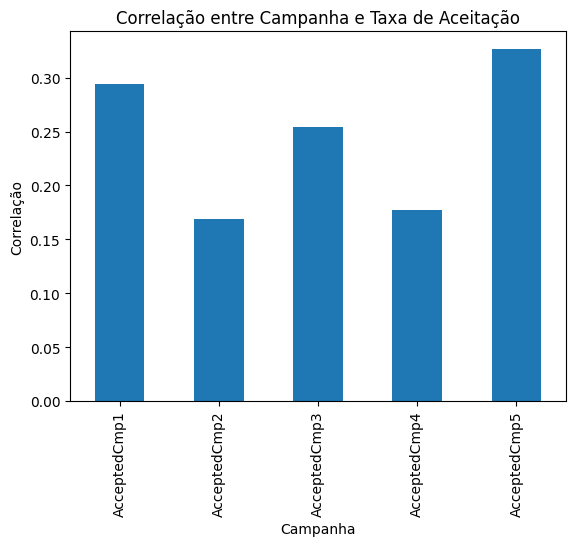

In [ ]:
# plotando a correlacao

correlacao.plot(kind='bar')
plt.xlabel('Campanha')
plt.ylabel('Correlação')
plt.title('Correlação entre Campanha e Taxa de Aceitação')
plt.show()

In [ ]:
# 3. Foco nos Produtos Mais Consumidos

# Definir grupos com base em condições de renda e ultima compra
df['Income_Group'] = np.where(df['Income'] > df['Income'].median(), 'Alto', 'Baixo')
df['Recency_Group'] = np.where(df['Recency'] < df['Recency'].median(), 'Recente', 'Antigo')

# Criar agrupamentos com base nas colunas criadas
# lista para selecionar várias colunas
agrupamento = df.groupby(['Income_Group', 'Recency_Group'])[['MntWines', 'MntMeatProducts', 'MntFishProducts']].mean() # Calcule apenas a média para as colunas especificadas
print(agrupamento)

                              MntWines  MntMeatProducts  MntFishProducts
Income_Group Recency_Group                                              
Alto         Antigo         540.970435       296.460870        63.358261
             Recente        532.709193       300.782364        65.001876
Baixo        Antigo          77.212914        39.994764        11.762653
             Recente         74.384615        36.259392        11.162791


In [ ]:
# 4. Análise de Recência e Frequência de Compras

# Calcular o consumo médio por categoria de produto
consumo_produtos = df[['MntWines', 'MntMeatProducts', 'MntFishProducts']].mean()
print(consumo_produtos)

# Verificar o consumo por nível de renda
consumo_renda = df.groupby('Income_Group')[['MntWines', 'MntMeatProducts']].mean()
print(consumo_renda)


MntWines           303.935714
MntMeatProducts    166.950000
MntFishProducts     37.525446
dtype: float64
                MntWines  MntMeatProducts
Income_Group                             
Alto          536.996390       298.539711
Baixo          75.816254        38.150177


In [ ]:
# Descrição das ultimas compras
print(df['Recency'].describe())




count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64


In [ ]:
# Analisar a média de compras por canal
compras_canais = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()
print(compras_canais)

NumWebPurchases        4.084821
NumCatalogPurchases    2.662054
NumStorePurchases      5.790179
dtype: float64


In [ ]:
# 5. Definição da Nova Campanha

# # Selecionar clientes alvo para a nova campanha

clientes_alvo = df[(df['Income_Group'] == 'Alto') & (df['Recency'] < 30)]
print(clientes_alvo[['ID', 'Income', 'Recency']])


        ID    Income  Recency
2     4141   71613.0       26
5     7446   62513.0       16
15    2114   82800.0       23
23    4047   65324.0        0
26    2404   53359.0        4
...    ...       ...      ...
2206  1092   61014.0       17
2221  7366   75777.0       12
2224  4286   57642.0       24
2233  9432  666666.0       23
2238  8235   69245.0        8

[343 rows x 3 columns]


Resumo da Analise:

A análise de correlação entre as taxas de aceitação das campanhas anteriores indica que a campanha 5 (AcceptedCmp5) teve a maior taxa de aceitação (0.326), seguida pelas campanhas 1 (AcceptedCmp1 com 0.294) e 3 (AcceptedCmp3 com 0.254). As campanhas 2 e 4 tiveram taxas de aceitação mais baixas.
Observações:

Campanha 5 foi a mais eficaz, seguida pelas campanhas 1 e 3.
Campanhas 2 e 4 tiveram desempenhos mais baixos, com correlações de 0.169 e 0.177, respectivamente.

Ideia para a Próxima Campanha:

Com base nesses resultados, uma abordagem otimista seria focar nos elementos de sucesso das campanhas 1, 3 e 5 e ajustar os fatores das campanhas menos aceitas (2 e 4). Aqui está uma estratégia positiva para a nova campanha:

1. Foco nos Clientes que Aceitaram as Campanhas Anteriores

Segmentação dos clientes que aceitaram as campanhas 1, 3 e 5: Identifique quais perfis de clientes responderam positivamente a essas campanhas e priorize a nova campanha para esse público. Esse grupo já demonstrou interesse em campanhas anteriores e tem mais chances de aceitar novamente.

In [ ]:
# Clientes Alvo


clientes_alvo = df[(df['AcceptedCmp1'] == 1) | (df['AcceptedCmp3'] == 1) | (df['AcceptedCmp5'] == 1)]
print(clientes_alvo.describe())


                 ID   Year_Birth         Income     Kidhome    Teenhome  \
count    370.000000   370.000000     367.000000  370.000000  370.000000   
mean    5350.145946  1968.935135   66621.738420    0.243243    0.302703   
std     3121.664284    13.558909   21816.137112    0.448146    0.504981   
min      146.000000  1899.000000    5648.000000    0.000000    0.000000   
25%     2805.750000  1958.000000   50150.000000    0.000000    0.000000   
50%     5144.500000  1970.000000   74637.000000    0.000000    0.000000   
75%     7902.750000  1979.000000   82534.000000    0.000000    1.000000   
max    11101.000000  1996.000000  105471.000000    2.000000    2.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count    370.000000    370.000000    370.000000    370.000000    370.000000   
mean       0.440541      0.202703      0.440541      0.389189      0.056757   
std        0.497124      0.402557      0.497124      0.488227      0.231691   
min     

In [ ]:
# Filtrar clientes que aceitaram as campanhas de maior aceitação
clientes_positivos = df[(df['AcceptedCmp1'] == 1) | (df['AcceptedCmp3'] == 1) | (df['AcceptedCmp5'] == 1)]

# Analisar padrões de consumo e perfil desses clientes
perfil_positivos = clientes_positivos[['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases']].mean()
print(perfil_positivos)


Income             66621.738420
MntWines             612.640541
MntMeatProducts      325.072973
NumWebPurchases        5.110811
dtype: float64


2. Replicar o Sucesso das Campanhas 1, 3 e 5

    Analise o que essas campanhas tinham em comum (produtos, descontos, canais de comunicação) e tente replicar essas características.
    Por exemplo, se a campanha 5 foi focada em promoções de vinhos e carnes, a nova campanha poderia expandir isso para produtos de alto valor agregado, usando promoções semelhantes.

3. Ajuste o Público das Campanhas Menos Aceitas

    Avalie o perfil de clientes que não aceitaram as campanhas 2 e 4 e tente entender o que não funcionou (preços, produtos, comunicação).
    A nova campanha pode ser adaptada para abordar essas falhas, oferecendo produtos mais relevantes ou ajustando a comunicação para esses grupos.

4. Promover o Sucesso das Campanhas

    Marketing positivo: Destaque o sucesso das campanhas anteriores (1, 3 e 5) na nova campanha, como "Campanhas anteriores de sucesso! Aproveite descontos em produtos favoritos!" Isso cria uma percepção positiva e reforça a confiança do cliente.

Conclusão Final:

Destaque o sucesso das campanhas anteriores e promova produtos que tiveram mais aceitação. Ao focar nos clientes mais engajados e otimizar as ofertas, a nova campanha pode aumentar a aceitação e maximizar o retorno.

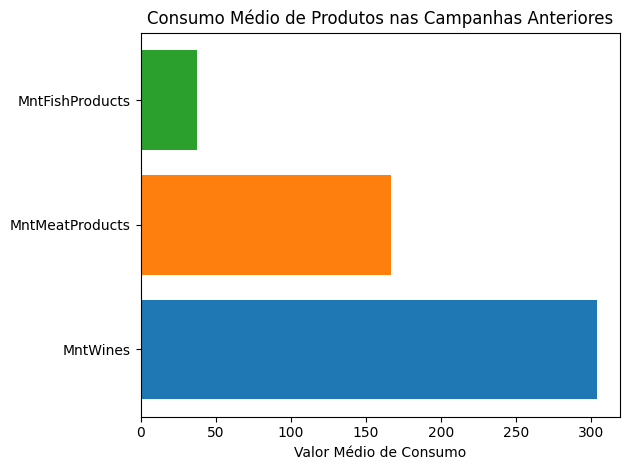

In [ ]:
# plotagem dos produtos que tiveram mais aceitação nas campanhas anteriores

import matplotlib.pyplot as plt

# Dados fornecidos
labels = ['MntWines', 'MntMeatProducts', 'MntFishProducts']
values = [303.935714, 166.950000, 37.525446]

# Criar gráfico de barras invertidas
plt.barh(labels, values, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Configurações do gráfico
plt.title('Consumo Médio de Produtos nas Campanhas Anteriores')
plt.xlabel('Valor Médio de Consumo')
plt.tight_layout()

# Exibir gráfico
plt.show()

